In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
df1 = pd.read_csv("/content/drive/My Drive/interview_revenue.csv")
df = pd.read_csv("/content/drive/My Drive/interview_events.csv")

# Veri setlerini import ettik.

## Şöyle bir göz geçirdiğimiz zaman elimiz de Raw bir data bulunmakta.

* İki adet tablomuz bulunmakta  ilki Userlara ait kazançları(revenue) ve günleri vermekte.

* Diğer tablomuz da ise Userlara ait Satirlarca akmış veriler görüyoruz.
* Girdikleri günler saat ile birlikte yazılmış. Aynı zamanda Event Id adı atlında kişinin oyuna girdiği andan başlıyor ve her level aldıkça skorunu yazdığını görebiliyoruz. 
* Value değişkenimiz User level atladıkça aldığı skorları vermekte. Bu yüzden NaN yazan yerler aslında gerçek NaN değil sadece satır bazlı bir eksiklik. 
* Yine diğer bir değişkenimiz bulunmakta Userların girdiği oyunların versiyonları bulunmakta. 
* Coountry Code değişkenin de ise kullanıcının hangi lokasyondan girdiğini görüyoruz.
* Son olarak bu veriler bir mobil oyun verisi olduğu için Usera ait cihazın işletim sistemi gözükmekte.

In [4]:
df1.head()

,user_id,revenue_day,revenue
0,7799779337307357843,2019-12-01,0.015406
1,2903532465681507879,2019-12-01,0.019093
2,7271844357181366660,2019-12-01,0.011785
3,-6989185766557698704,2019-12-01,0.013538
4,-1388044436100964633,2019-12-01,0.002288


* Görüldüğü gibi aslında bizim 1768 adet kullanıcımız var. Diğer veri setinde ise bu kullanıcılara ait veriler anlık akan veri olduğu için boyut farkı bulunmak bu yüzden işlemlerimize her Userı unique(benzersiz) ele alarak çıkarımlarımızı yapacağız.

In [6]:
df1.nunique()

user_id        1768
revenue_day      46
revenue        8791
dtype: int64

In [5]:
df.head(15)

,user_id,client_ts,event_id,value,version,country_code,os_type
0,-9215534650345115924,2019-12-01 17:36:45 UTC,Start:turkish:L0,NaN,1.20.00,TR,android
1,-9215534650345115924,2019-12-01 17:36:55 UTC,Complete:turkish:L0,NaN,1.20.00,TR,android
2,-9215534650345115924,2019-12-01 17:36:56 UTC,app:gameScore,100.0,1.20.00,TR,android
3,-9215534650345115924,2019-12-01 17:37:04 UTC,Start:turkish:L1,NaN,1.20.00,TR,android
4,-9215534650345115924,2019-12-01 17:37:06 UTC,wrong:turkish:L1,NaN,1.20.00,TR,android
5,-9215534650345115924,2019-12-01 17:37:07 UTC,wrong:turkish:L1,NaN,1.20.00,TR,android
6,-9215534650345115924,2019-12-01 17:37:11 UTC,app:gameScore,194.0,1.20.00,TR,android
7,-9215534650345115924,2019-12-01 17:37:11 UTC,Complete:turkish:L1,NaN,1.20.00,TR,android
8,-9215534650345115924,2019-12-01 17:37:20 UTC,Start:turkish:L2,NaN,1.20.00,TR,android
9,-9215534650345115924,2019-12-01 17:37:27 UTC,Complete:turkish:L2,NaN,1.20.00,TR,android


In [17]:
df.shape

(1748861, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748861 entries, 0 to 1748860
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   client_ts     object 
 2   event_id      object 
 3   value         float64
 4   version       object 
 5   country_code  object 
 6   os_type       object 
dtypes: float64(1), int64(1), object(5)
memory usage: 93.4+ MB


In [8]:
# Toplam 5 versiyon bulunmakta
# 12 Adet ülkemiz var
# İşletim sistemi ise 1 adet yani bu değişken işe yaramaz 

df[["version","country_code","os_type"]].nunique()

version          5
country_code    12
os_type          1
dtype: int64

In [9]:
# Versiyonlar

df["version"].unique()

array(['1.20.00', '1.21.00', '1.19.00', '1.18.00', '1.15.00'],
      dtype=object)

In [10]:
# Versiyonlara ait countlar

df["version"].value_counts()

1.20.00    986277
1.21.00    624054
1.19.00    133143
1.18.00      3804
1.15.00      1583
Name: version, dtype: int64

In [13]:
# Burada ülke kodlarını görebiliyoruz 

df["country_code"].unique()

array(['TR', 'AZ', 'DE', 'BE', 'US', 'NL', 'GB', 'CA', 'undefined', 'KZ',
       'BG', 'AT'], dtype=object)

In [14]:
# Ülkelere ait countlar

df["country_code"].value_counts()

TR           1699956
DE             42462
AZ              1942
BG              1701
GB               863
US               714
KZ               493
NL               381
BE               243
AT                51
undefined         29
CA                26
Name: country_code, dtype: int64

# *Simdi elimizdeki veriden anlamli şeyler çıkartmamız gerek. Bunun için öncelikle her kullanıcıya ait toplam geçirilen saati buluyoruz.*

 # *Daha sonra kullanıcıların toplam ulaştıkları leveli elde ediyoruz.*

## Toplam gecirilen saat. 

### Toplam saat bulunup başka bir frame üzerinden devam ediyoruz.

In [ ]:
df["date_time"] = pd.to_datetime(df["client_ts"])
liste = []
id  = []
for i in df['user_id'].unique():
    liste.append( df[df['user_id'] == i]['date_time'].max() - df[df['user_id'] == i]['date_time'].min())


table = pd.Series(df["user_id"].unique())
frame2 = pd.DataFrame({"users":table, "toplam saat" : liste})

## Max level buluyoruz. 

In [ ]:
dfx = df['event_id'].str.split(':',expand=True)

In [ ]:
dfa = dfx[2].str.strip('L')

In [ ]:
dfa = dfa.str.strip('DL')

In [ ]:
dfa = dfa.str.strip('PL')

In [ ]:
dfa = dfa.replace (np.nan , '0')

In [ ]:
dfs = pd.concat([ df, dfa], axis=1)

In [ ]:
dfs.rename(columns={2: 'level'},inplace=True)

In [ ]:
dfs['level'] = dfs['level'].astype('int')

In [ ]:
list= []

for i in dfs['user_id'].unique():
    list.append( dfs[dfs['user_id'] == i]['level'].max())

table = pd.Series(df["user_id"].unique())
frame3 = pd.DataFrame({"users":table, "max level" : list})
frame3.head()

,users,max level
0,-9215534650345115924,137
1,-9215240100939776087,282
2,-9202484284851622629,17
3,-9197151025395411316,42
4,-9167946499694210868,7


In [ ]:
# Burada dikkat edilmesi gerken şey 1.7 milyon satırlık bir tabloda aslında işlemi görülmesi gereken şey her Userın unique olarak değerlendirilmesidir

frame3.shape 

(1768, 2)

# *Userların Level başına skorları ve toplam skorları*

In [ ]:
total_score = []

for i in df["user_id"].unique():


    total = round(df[df["user_id"] == i].value.sum(), 3)


    total_score.append(total)


table = pd.Series(df["user_id"].unique())
frame1 = pd.DataFrame({"users":table,"toplam score":total_score , "son_level" : list})
frame1['level_basina_skor']  = frame1['toplam score'] / frame1['son_level']
frame1.head()

,users,toplam score,son_level,level_basina_skor
0,-9215534650345115924,540634.502,137,3946.237241
1,-9215240100939776087,3589694.584,282,12729.413418
2,-9202484284851622629,4735.535,17,278.560882
3,-9197151025395411316,90563.598,42,2156.276143
4,-9167946499694210868,3579.000,7,511.285714


In [ ]:
frame1.shape

(1768, 4)

# *Userlara ait Total elde edilen revenue*

In [ ]:
total_revenue = []

for i in df1["user_id"].unique():


    total = df1[df1["user_id"] == i].revenue.sum()


    total_revenue.append(total)


table = pd.Series(df1["user_id"].unique())
frame4 = pd.DataFrame({"user_id":table,"toplam revenue":total_revenue})

# *Günlük Userlardan elde edilen revenue*

In [ ]:
ids = []

for i in df1["user_id"].unique():
    #ids.append(i)
    ids.append(df1[df1["user_id"] == i]["revenue"].sum())
    result = np.array(ids)
    
table = pd.Series(df1["user_id"].unique())
frame = pd.DataFrame({"users":table,"toplam revenue":result})
frame.shape

(1768, 2)

In [ ]:
gun = []

for j in df1["user_id"].unique():
    gun.append(len(df1[df1["user_id"] == j]["revenue_day"]))
    

frame["user_total_days"] = pd.Series(gun)
frame["gunluk_revenue"] = frame["toplam revenue"] / frame["user_total_days"]
frame.head()

,users,toplam revenue,user_total_days,gunluk_revenue
0,7799779337307357843,0.037932,6,0.006322
1,2903532465681507879,0.295134,27,0.010931
2,7271844357181366660,0.031168,4,0.007792
3,-6989185766557698704,0.013538,1,0.013538
4,-1388044436100964633,0.013033,3,0.004344


In [ ]:
dfson = pd.merge(frame2, frame3 , on='users')

In [ ]:
dfson = pd.merge(dfson , frame1 , on='users' )

In [ ]:
dfson = pd.merge(dfson , frame , on='users' )

# *Toplam hata*

## *Bizim toplam elde ettiğimiz level vardı ve bu level içerisinde aynı zaman da yapılan hatalar var. Biz Userların toplam hatalarını da bulacağız.*

In [ ]:
bos = []

for i in df["user_id"].unique():
    bos.append(i)
    
df["new"] = df["event_id"].str.split(":",expand=True)[0]

In [ ]:
a = "new"
b = "user_id"

dolu = []

for i in bos:
    dolu.append(len(df[(df[a] == "wrong") & (df[b] == i)]["new"]))


In [ ]:
tablea = pd.Series(df["user_id"].unique())
frame5 = pd.DataFrame({"users":tablea,"toplam hata":dolu})

In [ ]:
dfson = pd.merge(dfson , frame5 , on='users' )

In [ ]:
dfson= dfson.set_index("users")

# *Elde ettiğimiz bir saat vardı buna tam saat bazında dönüştürme yapmamız gerek.*

In [ ]:
dfson['toplam saat'] / np.timedelta64(1, 'h')

users
-9215534650345115924    218.916667
-9215240100939776087    288.954444
-9202484284851622629      0.260833
-9197151025395411316     22.559722
-9167946499694210868      0.044444
                           ...    
 9205712211459362688      0.185000
 9210908092972712517      0.288889
 9215640541058628139    163.904444
 9215693985055962487      4.513889
 9221849159789412152     94.570833
Name: toplam saat, Length: 1768, dtype: float64

In [ ]:
dfson.head()

,toplam saat,max level,toplam score,son_level,level_basina_skor,toplam revenue,user_total_days,gunluk_revenue,toplam hata
users,,,,,,,,,
-9215534650345115924,9 days 02:55:00,137,540634.502,137,3946.237241,0.006209,10,0.000621,2921
-9215240100939776087,12 days 00:57:16,282,3589694.584,282,12729.413418,0.089060,19,0.004687,1330
-9202484284851622629,0 days 00:15:39,17,4735.535,17,278.560882,0.003801,1,0.003801,113
-9197151025395411316,0 days 22:33:35,42,90563.598,42,2156.276143,0.005653,2,0.002826,30
-9167946499694210868,0 days 00:02:40,7,3579.000,7,511.285714,0.013754,1,0.013754,1


In [ ]:
dfson['total_hours'] = dfson['toplam saat'] / np.timedelta64(1, 'h')

In [ ]:
dfson.drop(["toplam saat"], axis = 1, inplace = True)

In [ ]:
dfson.drop(["son_level"], axis = 1, inplace = True)

In [ ]:
dfson["day_hours"] = dfson["user_total_days"] / dfson["total_hours"]

In [ ]:
dfson.replace(np.inf, 0 , inplace=True)

In [ ]:
dfson[dfson["day_hours"] > 1000]

,max level,toplam score,level_basina_skor,toplam revenue,user_total_days,gunluk_revenue,toplam hata,total_hours,day_hours
users,,,,,,,,,
-3091959366018228993,0,97.0,0.0,0.004577,8,0.000572,1,0.004444,1800.000000
7164069523256665660,0,0.0,NaN,0.010693,2,0.005346,1,0.000278,7200.000000
8129818696111496284,0,94.0,0.0,0.000000,5,0.000000,2,0.003889,1285.714286


# Bu kısımda bir düzeltme yapıyoruz. Toplam günü bulmaya çalışırken yanlış kod yazımı sonucu tutarsızlık vardı onu hallediyoruz :)  


In [ ]:
df_duzeltme = df.copy()

df_duzeltme["date"]=pd.to_datetime(df_duzeltme["client_ts"])
df_duzeltme.rename(columns={"date":"fulldate"},inplace=True)
df_duzeltme.insert(3,"date",df_duzeltme["fulldate"].dt.date)

ll = []
for i in df_duzeltme["user_id"].unique():
    ll.append(df_duzeltme[df_duzeltme["user_id"] == i]["date"].nunique())
    
dfson["user_total_days"] = ll

# Bizim 5 adet versiyonumuz vardı ve bir kullancı birden fazlasıyla oyuna giriş yapmış olabilir o yüzden Girilen Toplam Versionu buluyoruz.

In [ ]:
version = []

for i in df['user_id'].unique():
    version.append(len(df[df["user_id"] == i]["version"].unique()))
    

dfson["girilen_toplam_version"] = version

# Userlar birden fazla lokasyondan giriş yapıyordu ve biz bunu arka planda inceledil. 1768 Userın neredeyse %90 kadarını TR oluşturuyordu. O yüzden TR & OTHERS şeklinde bunu ayırıyoruz. 

In [ ]:
dfdeneme1 = df.copy()

In [ ]:
dfdeneme3 = dfdeneme1.loc[: , ["user_id", "country_code"]]

In [ ]:
dfdeneme3

,user_id,country_code
0,-9215534650345115924,TR
1,-9215534650345115924,TR
2,-9215534650345115924,TR
3,-9215534650345115924,TR
4,-9215534650345115924,TR
...,...,...
1748856,9221849159789412152,TR
1748857,9221849159789412152,TR
1748858,9221849159789412152,TR
1748859,9221849159789412152,TR


In [ ]:
dfdeneme4 = dfdeneme3.drop_duplicates(subset = "user_id")

In [ ]:
frequencies = dfdeneme4["country_code"].value_counts(normalize = True)
frequencies
threshold = 0.1
small_categories = frequencies[frequencies < threshold].index
small_categories
dfdeneme4["country_code"] = dfdeneme4["country_code"].replace(small_categories, "Other")
dfdeneme4["country_code"].value_counts(normalize = True)

# evet %90 demiştim ama 97 aslında o :)

TR       0.971154
Other    0.028846
Name: country_code, dtype: float64

In [ ]:
dfdeneme4["country_code"].value_counts()

TR       1717
Other      51
Name: country_code, dtype: int64

In [ ]:
dfson.head()

# Her adım sonrası elde ettiğimiz bilgileri kurduğumuz temel dataframe üzerine ekleyerek devam ediyoruz. 

,max level,toplam score,level_basina_skor,toplam revenue,user_total_days,gunluk_revenue,toplam hata,total_hours,day_hours,girilen_toplam_version
users,,,,,,,,,,
-9215534650345115924,137,540634.502,3946.237241,0.006209,9,0.000621,2921,218.916667,0.045679,1
-9215240100939776087,282,3589694.584,12729.413418,0.089060,12,0.004687,1330,288.954444,0.065754,2
-9202484284851622629,17,4735.535,278.560882,0.003801,1,0.003801,113,0.260833,3.833866,1
-9197151025395411316,42,90563.598,2156.276143,0.005653,2,0.002826,30,22.559722,0.088654,2
-9167946499694210868,7,3579.000,511.285714,0.013754,1,0.013754,1,0.044444,22.500000,1


In [ ]:
dfdeneme4.rename(columns={"user_id" : "users"} , inplace=True)

In [ ]:
dfsondanonceki = pd.merge(dfson , dfdeneme4 , on = "users")

In [ ]:
dfsondanonceki.head()

,users,max level,toplam score,level_basina_skor,toplam revenue,user_total_days,gunluk_revenue,toplam hata,total_hours,day_hours,girilen_toplam_version,country_code
0,-9215534650345115924,137,540634.502,3946.237241,0.006209,9,0.000621,2921,218.916667,0.045679,1,TR
1,-9215240100939776087,282,3589694.584,12729.413418,0.089060,12,0.004687,1330,288.954444,0.065754,2,TR
2,-9202484284851622629,17,4735.535,278.560882,0.003801,1,0.003801,113,0.260833,3.833866,1,TR
3,-9197151025395411316,42,90563.598,2156.276143,0.005653,2,0.002826,30,22.559722,0.088654,2,TR
4,-9167946499694210868,7,3579.000,511.285714,0.013754,1,0.013754,1,0.044444,22.500000,1,TR


In [ ]:
dfsondanonceki["country_code"].value_counts()

TR       1717
Other      51
Name: country_code, dtype: int64

In [ ]:
dfson = dfsondanonceki

# *Sırada EDA(exploratory data analysis) var yani Keşfedici Veri Analizi. Bu kısımda daha çok görseller ilerliyor olacağız.* 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


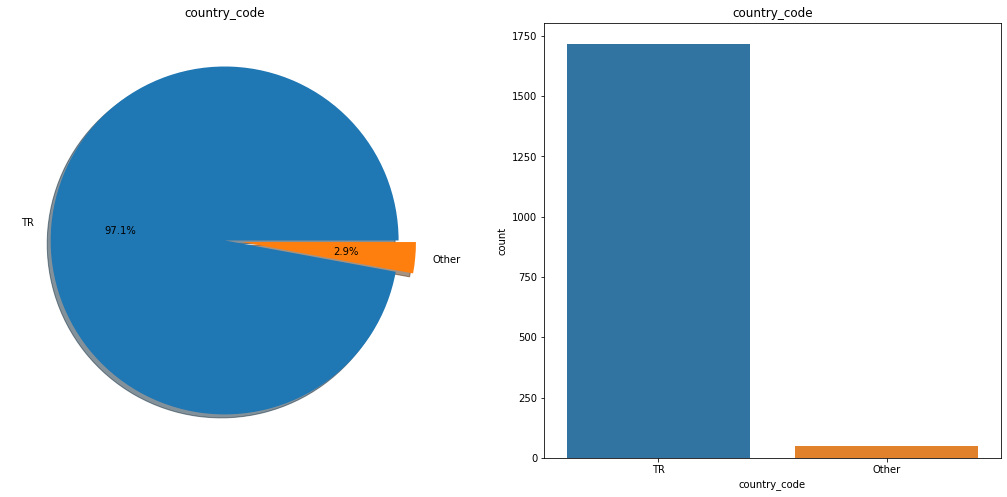

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dfson['country_code'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('country_code')
ax[0].set_ylabel('')
sns.countplot('country_code',data=dfson,ax=ax[1])
ax[1].set_title('country_code')
plt.show()

# Bu görselde TR OTHERS dağılımının ne kadar dengesiz olduğunu görebiliyoruz 

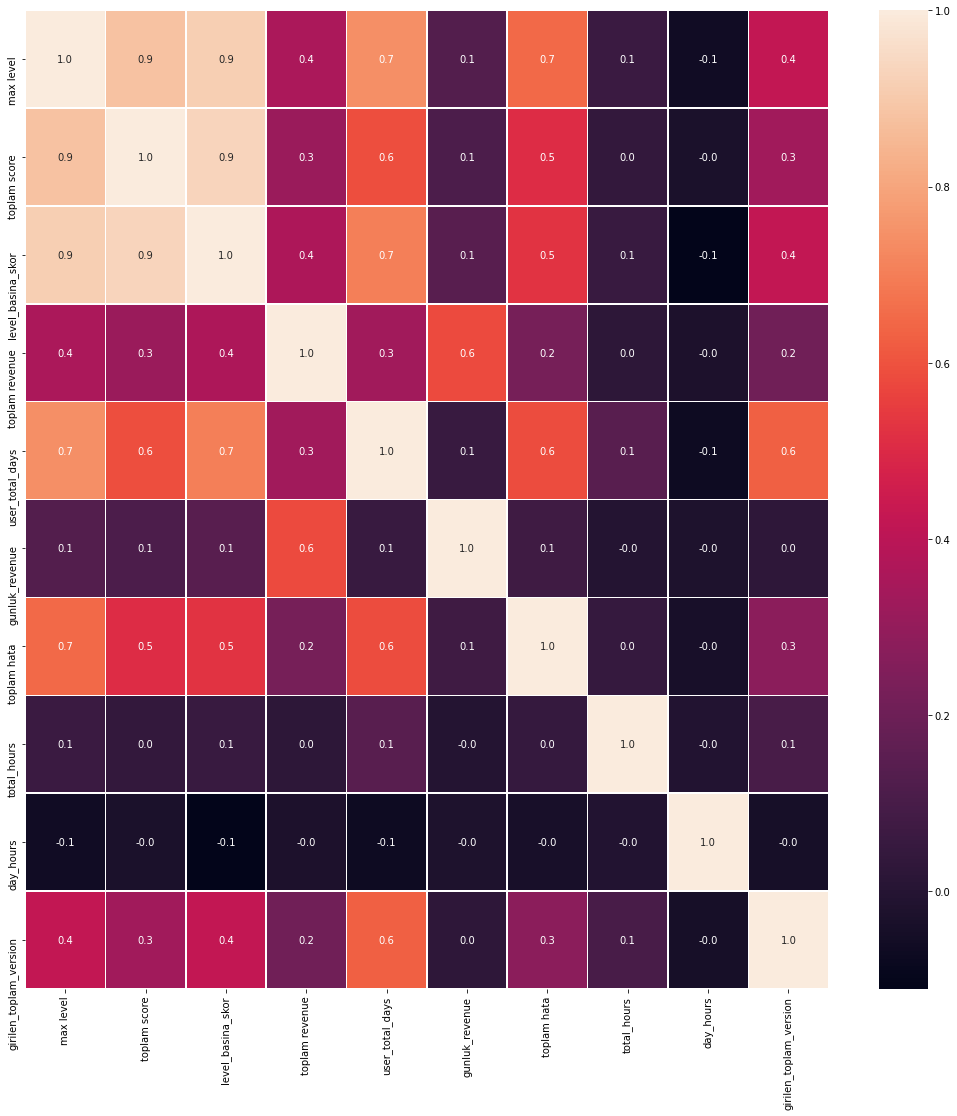

In [ ]:
# Korelasyon haritasına da şöyle bir göz geçirelim

dfson1 = dfson.drop(["users"],axis=1)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(dfson1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
dfson.columns

Index(['users', 'max level', 'toplam score', 'level_basina_skor',
       'toplam revenue', 'user_total_days', 'gunluk_revenue', 'toplam hata',
       'total_hours', 'day_hours', 'girilen_toplam_version', 'country_code'],
      dtype='object')

In [ ]:
# Değişken isimleri arasında boşluk vardı bunun için ufak bir düzeltme

dfson.rename(columns = {"max level" : "max_level",
             "toplam score" : "toplam_score",
             "toplam revenue" : "toplam_revenue",
             "toplam hata" : "toplam_hata",
             }, inplace = True)

In [ ]:
# Bizim eşsiz 2085 eventimiz var
# Bunlar start level ve complete olarak tekrarlıyor ardından Gamescore alıyoruz

df["event_id"].nunique()

2085

In [ ]:
df["event_id"].unique()

array(['Start:turkish:L0', 'Complete:turkish:L0', 'app:gameScore', ...,
       'Start:turkish:DL22', 'wrong:turkish:DL22',
       'Complete:turkish:DL22'], dtype=object)

In [ ]:
# Şimdi Görselleştirme yapabilmek adına bazı numeric değişkenleri ölçeklendiriyoruz
# Bunun sonucu olarak bir şeyler elde edebileceğiz 

# max lvl grupla
# toplam hata grupla
# total days grupla 
# toplam score u 0 100 arası scale edip gorsellestirebilirsin
# toplam revenue*1000 yap anlamli bir gorsel cikar

In [ ]:
# Toplam Gunlerin Gruplanmasi

dfson.insert(12,"toplam_gun_groups",np.NaN)
dfson.loc[dfson["user_total_days"]<4,"toplam_gun_groups"]="0-3 gun"
dfson.loc[((dfson["user_total_days"]>3) & (dfson["user_total_days"]<9)),"toplam_gun_groups"]="4-8 gun"
dfson.loc[(dfson["user_total_days"]>8),"toplam_gun_groups"]="8+ gun"

categories = ["0-3 gun","4-8 gun","8+ gun"]
dfson['toplam_gun_groups'] = dfson.toplam_gun_groups.astype(str)

dfson['toplam_gun_groups'] = dfson.toplam_gun_groups.astype('category')

dfson['toplam_gun_groups'] = pd.Categorical(dfson["toplam_gun_groups"],categories=categories)

In [ ]:
# Toplam Hatalarin Gruplanmasi

dfson.insert(13,"toplam_hata_groups",np.NaN)
dfson.loc[dfson["toplam_hata"]<51,"toplam_hata_groups"]="0-50 arasi hata"
dfson.loc[((dfson["toplam_hata"]>50) & (dfson["toplam_hata"]<151)),"toplam_hata_groups"]="50-150 arasi hata"
dfson.loc[((dfson["toplam_hata"]>150) & (dfson["toplam_hata"]<301)),"toplam_hata_groups"]="150-300 arasi hata"
dfson.loc[((dfson["toplam_hata"]>300) & (dfson["toplam_hata"]<551)),"toplam_hata_groups"]="300-550 arasi hata"
dfson.loc[((dfson["toplam_hata"]>550)),"toplam_hata_groups"]="+500 ustu hata"

categories = ["0-50 arasi hata","50-150 arasi hata","150-300 arasi hata","300-550 arasi hata","+500 ustu hata"]

dfson['toplam_hata_groups'] = dfson.toplam_hata_groups.astype(str)

dfson['toplam_hata_groups'] = dfson.toplam_hata_groups.astype('category')

dfson['toplam_hata_groups'] = pd.Categorical(dfson["toplam_hata_groups"],categories=categories)

In [ ]:
# Toplam Levelin gruplanmasi

dfson.insert(14,"max_level_groups",np.NaN)
dfson.loc[dfson["max_level"]<51,"max_level_groups"]="0-50 levels"
dfson.loc[((dfson["max_level"]>50) & (dfson["max_level"]<150)),"max_level_groups"]="50-150 levels"
dfson.loc[((dfson["max_level"]>151) & (dfson["max_level"]<251)),"max_level_groups"]="150-250 levels"
dfson.loc[((dfson["max_level"]>250) & (dfson["max_level"]<401)),"max_level_groups"]="250-400 levels"
dfson.loc[(dfson["max_level"]>400),"max_level_groups"]="+400 levels"

categories = ["0-50 levels","50-150 levels","150-250 levels","250-400 levels","+400 levels"]

dfson['max_level_groups'] = dfson.max_level_groups.astype(str)

dfson['max_level_groups'] = dfson.max_level_groups.astype('category')

dfson['max_level_groups'] = pd.Categorical(dfson["max_level_groups"],categories=categories)

In [ ]:
# Toplam Skorun gorsellestirilmesi adina 0-100 arasi Scale edilmesi

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,100))

scale_data = dfson["toplam_score"].copy()

scale_data = np.array(scale_data)
scale_data = scale_data[...,np.newaxis]

dfson["Scale_score"] = scale.fit_transform(scale_data)

In [ ]:
# Toplam Revenue icin donusum; amac daha okunabilir ve yorumlanabilir bir sekilde entegre etmek bu yuzden scale ederek 0-100 arasi indirgiyoruz

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range=(0,100))

scale_data_1 = dfson["toplam_revenue"].copy()

scale_data_1 = np.array(scale_data_1)
scale_data_1 = scale_data_1[...,np.newaxis]

dfson["Scale_revenue"] = scale.fit_transform(scale_data_1)

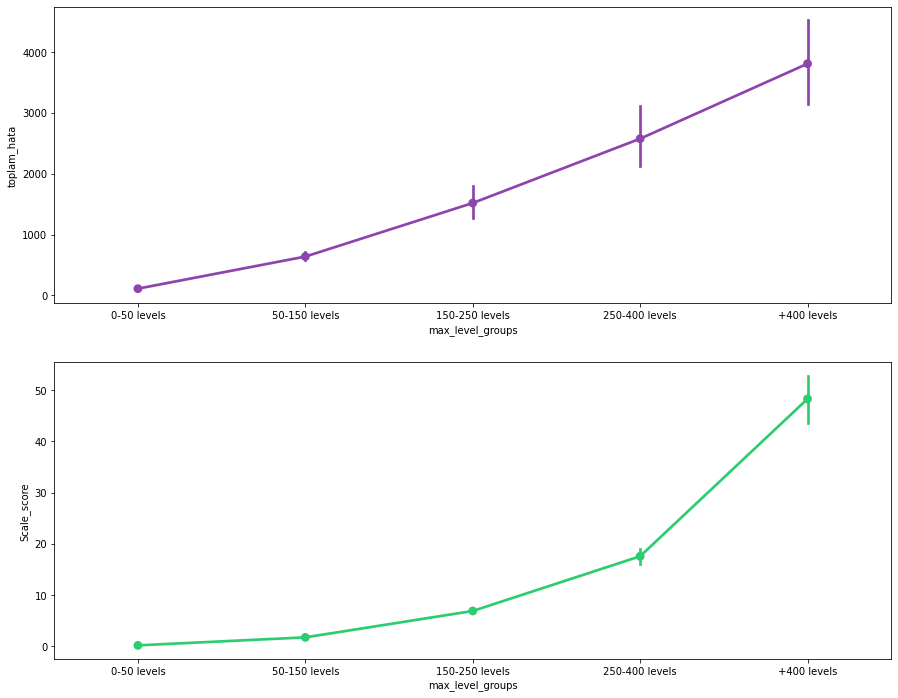

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=dfson,x="max_level_groups",y="toplam_hata",color="#8E44AD",ax=ax[0])
sns.pointplot(data=dfson,x="max_level_groups",y="Scale_score",color="#2ECC71",ax=ax[1])


# Level gruplarina gore toplam hata da artan bir trend goruyoruz ki beklendik bir seydir
# Sebebi ise genel olarak oynama suresi artacagindan yapacagi hatalar da artacaktir

# Ayni sekilde level gruplari ile Scale edilmis skor(0-100 arasi) arasinda da artan bir tred bulunmakta
# Leveli fazla olan oyuncuların skorlari her zaman daha yuksek olmakta

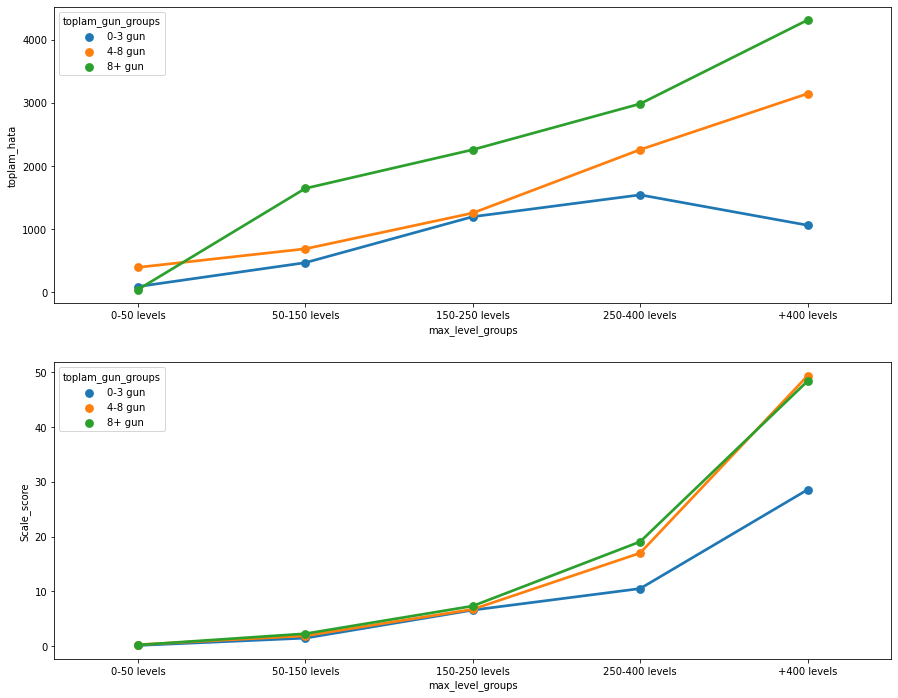

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,12))
sns.pointplot(data=dfson,x="max_level_groups",y="toplam_hata",hue="toplam_gun_groups",ax=ax[0],ci=None)
sns.pointplot(data=dfson,x="max_level_groups",y="Scale_score",hue="toplam_gun_groups",ax=ax[1],ci=None)

# Bir onceki grafikte iki degisken ile durumlari incelemistik, simdi isin icine kirilma noktasi girince islerin nasil degistine bakalim
# Ilk gorsel de Gecireln gun sayisi da isin icine dahil oldugun da AYNI LEVELE GELENLER arasinda gunu az olanlarin daha az hata yaptigini gormekteyiz
# Bunun sebebi kisa sure icerisinde ayni leveli gorenler ile uzun surede buraya ulasanlar arasinda bir yetenek durumu olabilir
# Kisa surede ayni levele gelenler daha az hata yaparak o noktaya ulasmis olarak gozukmekte iken oyunda daha uzun sure gecirenler daha fazla hata oranina sahip

# Ikinci gorsel ile devam edersek ise oyunda daha fazla zaman gecirdigi icin hata yapan gruplar bu defa daha fazla skora sahip oldugu gorulmekte
# Dikkat ceken bir diger nokta ise 4-8 gun araliginin skor olarak cok az farkla da olmasi birinci bunun dikkat cekmesinin sebebi ise su ki;
# Normalde gunu fazla olanlar trend icerisinde en yukarida oluyordu ama bu defa islerin degistigi gozukmekte
# 4-8 gun araliginda level olarak digerleri ile ayni durumda olan kullanicilar skor olarakta birinci gozukmekte
# Bunun arkasinda birden cok sebep yatabilir en azindan akila gelenlerden biri gecirilen saat farki olabilir, derece kasmakta kabiliyet farki girebilir araya 

In [ ]:
import plotly.express as px
df = dfson
fig = px.box(df, x="toplam_gun_groups", y="Scale_revenue")
fig.show()

# Gerceklestirdigimiz islem de gun gruplari bazinda Kazanc(revenue) dagilimini goruyoruz. Kazanci 0-100 arasi indirgemistik
# Sirasiyla 8 gun uzeri, 4-8 gun arasi ve 0-3 arasi gruplar arasinda buyukten kucuge bir getiri durumu var
# Ayni zaman da outlierlar gruplar uzerinde baskin sekilde de gozukmektedir

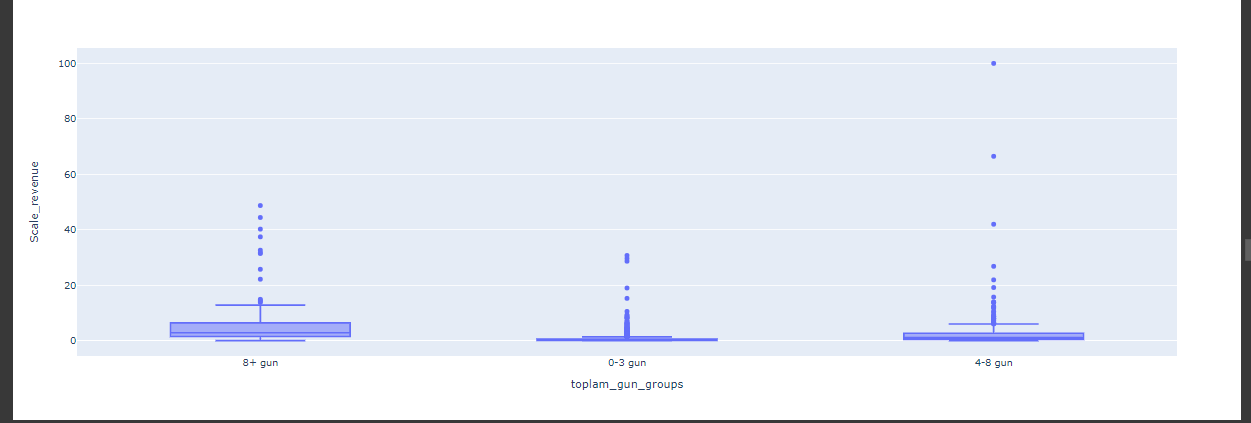

In [7]:
# GOrslei Ekran goruntusu olarak atmak zorunda kaldim Github da Plotly çıktıları gözükmüyor maalesef
# Ama kendi jupyter notebookunuz da yada colab da veya kaggle da bu sıkıntıyı almazsınız

In [ ]:
import plotly.express as px

df = dfson

fig = px.box(df, x="toplam_gun_groups", y="Scale_revenue", color="country_code")
fig.update_traces() # or "inclusive", or "linear" by default
fig.show()

# Var olan duruma bir de kirilim ekledigimiz de isin arka planinda daha etkin seyler oldugunu da goruyoruz nedir bu etkin durum?
# TR kullanicilari haricinde diger kullanicilarin getiri olarak her grupta daha fazla oldugu gorulmekte
# Ozellikle 4-8 gun araliginda ki Other diger lokasyonlardan baglanan kullanicilar yuksek derece getiri saglamakta


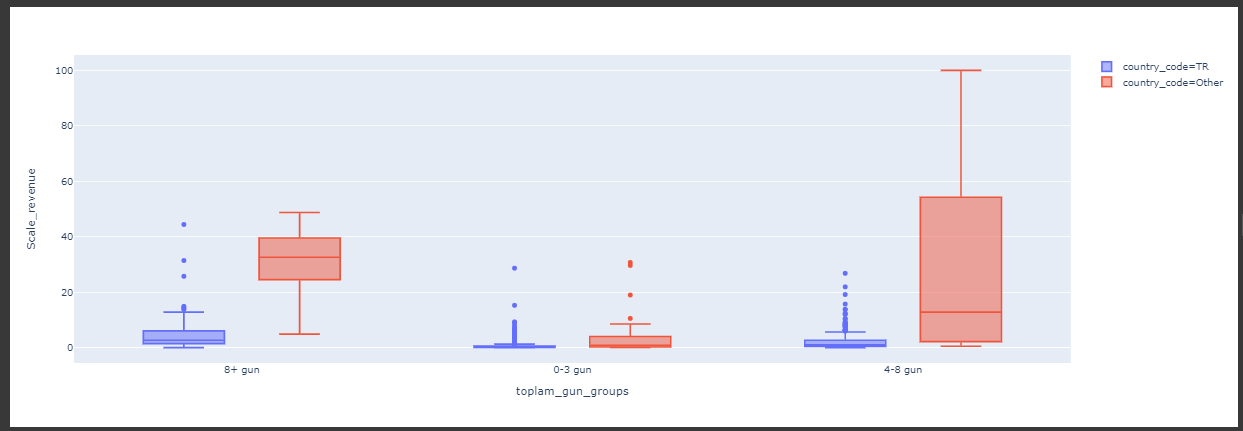

In [6]:
# GOrslei Ekran goruntusu olarak atmak zorunda kaldim Github da Plotly çıktıları gözükmüyor maalesef
# Ama kendi jupyter notebookunuz da yada colab da veya kaggle da bu sıkıntıyı almazsınız

In [ ]:
deneme = dfson[["max_level_groups","toplam_gun_groups","Scale_revenue"]].copy()
df_0_3_gun = deneme[deneme["toplam_gun_groups"] == '0-3 gun']
df_4_8_gun = deneme[deneme["toplam_gun_groups"] == '4-8 gun']
df_8_gun = deneme[deneme["toplam_gun_groups"] == '8+ gun']

In [ ]:
import plotly.graph_objects as go

trace0 = go.Box(
    y=df_0_3_gun["Scale_revenue"],
    x=df_0_3_gun["max_level_groups"],
    name='Dusuk gun',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_4_8_gun['Scale_revenue'],
    x=df_4_8_gun['max_level_groups'],
    name='Orta derece gun',
    marker=dict(
        color='#FF4136'
    )
)

trace2 = go.Box(
    y=df_8_gun['Scale_revenue'],
    x=df_8_gun['max_level_groups'],
    name='Yuksek gun ',
    marker=dict(
        color='#1f77b4'
    )
)


    
data = [trace0, trace1,trace2]

layout = go.Layout(
    yaxis=dict(
        title='Toplam Getiri',
        zeroline=False
    ),
    xaxis=dict(
        title='Gun durumlari'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

fig.show()
#plotly.iplot(fig, filename='box-age-cat')

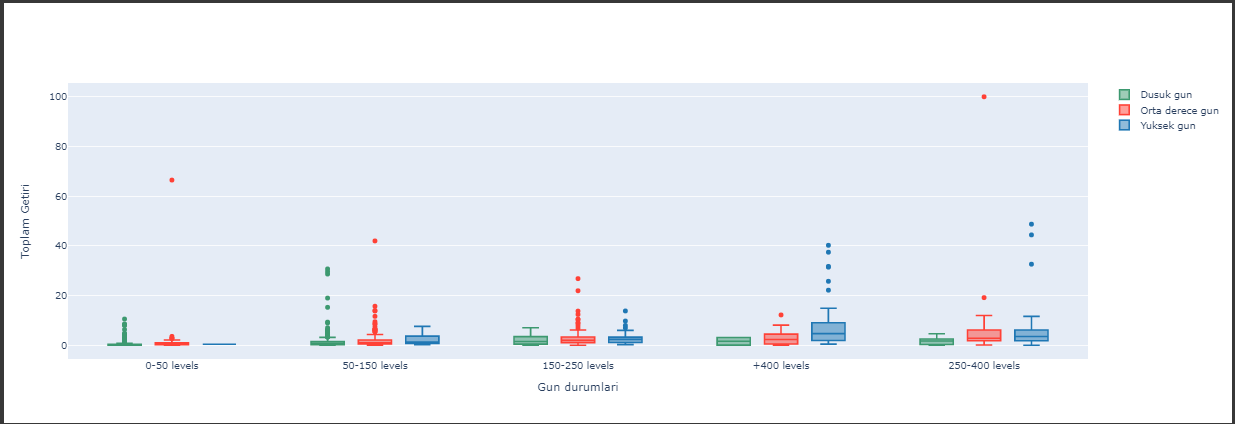

In [8]:
# GOrslei Ekran goruntusu olarak atmak zorunda kaldim Github da Plotly çıktıları gözükmüyor maalesef
# Ama kendi jupyter notebookunuz da yada colab da veya kaggle da bu sıkıntıyı almazsınız

* Bu gorselimiz de ise gun durumlarina ve level gruplari bir arada degerlendirilmis olup iki etkilesim durumuna gore getirinin urumu gosterilmek istenmistir.

* Baktigimiz da yuksek gun ve yuksek level durumlarina sahip gruplar getirisi en fazla olarak gorulmekte

# FEATURE DÜZELTMELER !!!!!!!!!!!!!

*Bu başlık adı altında Userlara ait Toplam bazda bulduğumuz değişkenleri Günlük baza çevirmeye olabildiğince çevirmeye çalıştık*

*Peki bunu neden yaptık?*

*Elimizdeki veri günlük akan canlı bir veri bu yüzden toplam olarak ayarlanacak her şey hemen hemen birbirleri ile korele olacaktır buda bizim istediğimiz tür de bir şey değil.*

In [ ]:
# Burada değişkenler için hedeflenen planlamayı görüyoruz

## max_level i gün bazında al
## level basına skoru gün bazında al
## user total days kaldır
## day_hours ; gün bazında al
## girilen toplam version -> dummy yap
## max level / total revenue ; gün bazında al
## ortalama skor / total hours ; gün bazında al
## ortalama revenue ; gün bazı
## total_wrong / total_hour ; gün bazında al
## users ; index yap

## max_level i gün bazında alma işlemi < Günlük toplam ulaşılan level

In [ ]:
dfson['günlük level'] =  dfson['max_level'] / dfson['user_total_days']
##günlük level

## Level başına skorumuz vardı onu günlük olacak şekilde düzenliyoruz

In [ ]:
df3 = pd.read_csv("/content/drive/My Drive/interview_events.csv") # Event datasını tekrar alıyoruz üzerinden işlem gerçekleştirmek için 

In [ ]:
df3["value"].isnull().sum()

1585508

In [ ]:
df3.dropna(inplace = True)

In [ ]:
# Toplam skoru tekrar elde ediyoruz ardından onun üzerinden ortalama skoru elde ediyoruz 

total_score = []

for i in df3["user_id"].unique():


    total = round(df3[df3["user_id"] == i].value.mean())


    total_score.append(total)


table = pd.Series(df3["user_id"].unique())
frame1 = pd.DataFrame({"users":table,"ortalama_score":total_score})
frame1.head()

,users,ortalama_score
0,-9215534650345115924,3781
1,-9215240100939776087,11731
2,-9202484284851622629,677
3,-9197151025395411316,2058
4,-9167946499694210868,447


In [ ]:
dfsondeneme3 = pd.merge(dfson , frame1 , on = "users")

In [ ]:
dfsondeneme3.head()

,users,max_level,toplam_score,level_basina_skor,toplam_revenue,user_total_days,gunluk_revenue,toplam_hata,total_hours,day_hours,girilen_toplam_version,country_code,toplam_gun_groups,toplam_hata_groups,max_level_groups,Scale_score,Scale_revenue,günlük level,ortalama_score
0,-9215534650345115924,137,540634.502,3946.237241,0.006209,9,0.000621,2921,218.916667,0.045679,1,TR,8+ gun,+500 ustu hata,50-150 levels,2.863365,0.167366,15.222222,3781
1,-9215240100939776087,282,3589694.584,12729.413418,0.089060,12,0.004687,1330,288.954444,0.065754,2,TR,8+ gun,+500 ustu hata,250-400 levels,19.012115,2.400532,23.500000,11731
2,-9202484284851622629,17,4735.535,278.560882,0.003801,1,0.003801,113,0.260833,3.833866,1,TR,0-3 gun,50-150 arasi hata,0-50 levels,0.025081,0.102458,17.000000,677
3,-9197151025395411316,42,90563.598,2156.276143,0.005653,2,0.002826,30,22.559722,0.088654,2,TR,0-3 gun,0-50 arasi hata,0-50 levels,0.479652,0.152362,21.000000,2058
4,-9167946499694210868,7,3579.000,511.285714,0.013754,1,0.013754,1,0.044444,22.500000,1,TR,0-3 gun,0-50 arasi hata,0-50 levels,0.018955,0.370725,7.000000,447


In [ ]:
# Burada ortalama skoru toplam güne bölerek aslında gün bazında ortalama skoru elde ediyoruz

dfson["ortalama_score_div_total_hours_gun"] = dfsondeneme3["ortalama_score"] / dfsondeneme3["user_total_days"]

In [ ]:
# Ardindan gün bazinda elde ettiğimiz ortalama skoru kullanarak günlük levele bölüyoruz buradaki amaç ise günlük level başına elde edilen skoru bulmak 

dfson["gunluk_level_basina_skor"] = dfson["ortalama_score_div_total_hours_gun"] / dfson['günlük level']
##günlük level basına skor

In [ ]:
dfson.head()

,users,max_level,toplam_score,level_basina_skor,toplam_revenue,user_total_days,gunluk_revenue,toplam_hata,total_hours,day_hours,girilen_toplam_version,country_code,toplam_gun_groups,toplam_hata_groups,max_level_groups,Scale_score,Scale_revenue,günlük level,ortalama_score_div_total_hours_gun,gunluk_level_basina_skor
0,-9215534650345115924,137,540634.502,3946.237241,0.006209,9,0.000621,2921,218.916667,0.045679,1,TR,8+ gun,+500 ustu hata,50-150 levels,2.863365,0.167366,15.222222,420.111111,27.598540
1,-9215240100939776087,282,3589694.584,12729.413418,0.089060,12,0.004687,1330,288.954444,0.065754,2,TR,8+ gun,+500 ustu hata,250-400 levels,19.012115,2.400532,23.500000,977.583333,41.599291
2,-9202484284851622629,17,4735.535,278.560882,0.003801,1,0.003801,113,0.260833,3.833866,1,TR,0-3 gun,50-150 arasi hata,0-50 levels,0.025081,0.102458,17.000000,677.000000,39.823529
3,-9197151025395411316,42,90563.598,2156.276143,0.005653,2,0.002826,30,22.559722,0.088654,2,TR,0-3 gun,0-50 arasi hata,0-50 levels,0.479652,0.152362,21.000000,1029.000000,49.000000
4,-9167946499694210868,7,3579.000,511.285714,0.013754,1,0.013754,1,0.044444,22.500000,1,TR,0-3 gun,0-50 arasi hata,0-50 levels,0.018955,0.370725,7.000000,447.000000,63.857143


In [ ]:
# Ardından düşürüyoruz 

dfson.drop(columns = "ortalama_score_div_total_hours_gun" , axis = 1 , inplace = True)

# day_hours

* Şimdi ise aktif olunan günler bazında kişinin kaç saat oyunu oynadığını elde ediyoruz.

In [ ]:
dfson["day_hours"] =df["total_hours"] / df["user_total_days"]
##gecirdigimiz günler boyunca geldigim günlerde aktif kac saat oyandım

##  Girilen toplam version & country code değişkenlerini dummy yapıyoruz.

In [ ]:
dfson['girilen_toplam_version'] = dfson['girilen_toplam_version'].astype(object)

In [ ]:
dfson= pd.get_dummies(dfson, columns =['country_code' ,'girilen_toplam_version'])

## max_level / total_revenue - gün bazında

* Bu kısımda ise level bazinda elde dilen gelir ne kadar onu buluyoruz.
* Ardından içerisinde İNF şeklinde olan kısımları 0 ile dolduruyoruz.
* Daha sonra level bazında elde ettiğimiz kazancı günlük formata çeviriyoruz

In [ ]:
# max level / total revenue
dfson["max_level_total_revenue"] =  dfson["toplam_revenue"] / dfson["max_level"]  


In [ ]:
dfson["max_level_total_revenue"].replace(np.inf,0,inplace = True)

In [ ]:
dfson["gunluk_ortalama_lvl_basina_revenue"] = dfson["max_level_total_revenue"] / dfson['user_total_days']
### günlük ortalama level basına gelen revenue

## ortalama score / total hours - gün bazında

* Günlük ortalama skoru elde etmiştik ama dataframe entegre etmedik başka bir değişkeni bulmak amaçlı kullanmıştık. Şimdi günlük ortalama skoru da dataframe entegre ediyoruz.

In [ ]:
df3 = pd.read_csv("/content/drive/My Drive/interview_events.csv")

df3["value"].isnull().sum()

1585508

In [ ]:
df['günlük_ortalama_skor'] = dfsondeneme3["ortalama_score"] / dfsondeneme3["user_total_days"]
##günlük ortalama skor

## Sırada son değişkeni elde ediyoruz. Bu değişkenimiz toplam yapılan hatayı günlük olacak şekilde transform edeceğiz ve dataframe ekleyip devam edeceğiz. 

In [ ]:
dfson.head(3)

# DataFrame bu sekilde idi simdi isleme geciyoruz

,users,max_level,toplam_score,level_basina_skor,toplam_revenue,user_total_days,toplam_hata,total_hours,day_hours,toplam_gun_groups,toplam_hata_groups,max_level_groups,Scale_score,Scale_revenue,günlük level,gunluk_level_basina_skor,country_code_Other,country_code_TR,girilen_toplam_version_1,girilen_toplam_version_2,girilen_toplam_version_3,gunluk_ortalama_lvl_basina_revenue,ortalama_revenue,ortalama_revenue_gun
0,-9215534650345115924,137,540634.502,3946.237241,0.006209,9,2921,218.916667,24.324074,8+ gun,+500 ustu hata,50-150 levels,2.863365,0.167366,15.222222,27.598540,0,1,1,0,0,0.000005,0.000621,0.000069
1,-9215240100939776087,282,3589694.584,12729.413418,0.089060,12,1330,288.954444,24.079537,8+ gun,+500 ustu hata,250-400 levels,19.012115,2.400532,23.500000,41.599291,0,1,0,1,0,0.000026,0.004687,0.000391
2,-9202484284851622629,17,4735.535,278.560882,0.003801,1,113,0.260833,0.260833,0-3 gun,50-150 arasi hata,0-50 levels,0.025081,0.102458,17.000000,39.823529,0,1,1,0,0,0.000224,0.003801,0.003801


In [ ]:
dfson["total_wrong_gun"] = dfson["toplam_hata"] / dfson["user_total_days"]

# *Bizim Churn(müşteri terk etme durumu) eden kullanıcılarımız vardı. Biz bunu şu şekilde belirliyoruz.* 

# *Bir kişi oyuna 7 günden daha az girmişse biz bunlara 1 yani churn etmiştir eğer oyuna 7 günden fazla girmişse 0 yani chrun etmemiştir etiketi basıyoruz.* 



In [ ]:
dfson['label'] = ['1' if x < 7 else '0' for x in dfson["user_total_days"]]

In [ ]:
# Burada önemli bir işlem gerçekleştiriyoruz.
# Toplam bazlı olan değişkenlerin hepsini düşürüyoruz çünkü günlük akan bir veride değişkenlerin toplam baz da kaideye alınması korele bir durum oluşturuyordu.


dfson.drop(columns = ["max_level" ,"toplam_score","level_basina_skor","toplam_revenue","user_total_days","toplam_hata","total_hours"] , axis = 1 , inplace = True)

In [ ]:
dfsonmodel = dfson

In [ ]:
# Görselleştirme için kullanılan değişkenleri de düşürüyoruz

dfsonmodel.drop(columns = ["toplam_gun_groups","toplam_hata_groups","max_level_groups","Scale_score","Scale_revenue"] , axis = 1 , inplace = True)

In [ ]:
df_final = dfsonmodel.reset_index()

In [ ]:
df_final.drop("users",axis=1,inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   day_hours                           1768 non-null   float64
 1   günlük level                        1768 non-null   float64
 2   gunluk_level_basina_skor            1742 non-null   float64
 3   country_code_Other                  1768 non-null   uint8  
 4   country_code_TR                     1768 non-null   uint8  
 5   girilen_toplam_version_1            1768 non-null   uint8  
 6   girilen_toplam_version_2            1768 non-null   uint8  
 7   girilen_toplam_version_3            1768 non-null   uint8  
 8   gunluk_ortalama_lvl_basina_revenue  1750 non-null   float64
 9   ortalama_revenue                    1768 non-null   float64
 10  ortalama_revenue_gun                1768 non-null   float64
 11  total_wrong_gun                     1768 no

In [ ]:
dfa = df_final.copy()

In [ ]:
# Bu işlemler sonucu info kısmında da görebileceğimiz gibi "gunluk_level_basina_skor 1742" & "gunluk_ortalama_lvl_basina_revenue  1750" eksik değerler var
# Aynı zamanda çok az bir miktar İNF barındırıyor. Bunlardan NaN olanları düşürüyor ve İNF olanlara 0 atıyoruz. 

dfa.dropna(inplace=True)

dfa = dfa.replace(np.inf , 0 )

In [ ]:
# Evet sonuç olarak tüm işlemler tamam 
# Şimdi bunca data operasyonundan sonra sırada makine öğrenmesine dayalı chrun tahminlemesi yapcağız

dfa

,day_hours,günlük level,gunluk_level_basina_skor,country_code_Other,country_code_TR,girilen_toplam_version_1,girilen_toplam_version_2,girilen_toplam_version_3,gunluk_ortalama_lvl_basina_revenue,ortalama_revenue,ortalama_revenue_gun,total_wrong_gun,label
0,24.324074,15.222222,27.598540,0,1,1,0,0,0.000005,0.000621,0.000069,324.555556,0
1,24.079537,23.500000,41.599291,0,1,0,1,0,0.000026,0.004687,0.000391,110.833333,0
2,0.260833,17.000000,39.823529,0,1,1,0,0,0.000224,0.003801,0.003801,113.000000,1
3,11.279861,21.000000,49.000000,0,1,0,1,0,0.000067,0.002826,0.001413,15.000000,1
4,0.044444,7.000000,63.857143,0,1,1,0,0,0.001965,0.013754,0.013754,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737,11.626944,9.000000,110.222222,0,1,1,0,0,0.000314,0.002824,0.002824,70.000000,1
1738,23.708833,126.800000,5.859621,0,1,1,0,0,0.000061,0.038741,0.007748,820.800000,1
1739,26.674969,47.111111,16.508844,1,0,0,1,0,0.000308,0.069233,0.007693,145.555556,0
1740,16.740278,15.500000,107.677419,0,1,1,0,0,0.000145,0.004503,0.002252,78.500000,1


In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,mean_squared_error

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
dfa = pd.read_csv("/content/drive/My Drive/DataSon.csv")


In [ ]:
X = dfa.drop(["label"],axis=1)
y = dfa.label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

In [ ]:
# XGBOOST
# Düz hiçbir şeye dokunmadan elde ettiğimiz XGB sonucu gayet iyi 

from xgboost import XGBClassifier 
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------")
print(classification_report(y_test,y_pred))

0.9565217391304348
-----------------------------
[[ 42   8]
 [  7 288]]
-----------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        50
           1       0.97      0.98      0.97       295

    accuracy                           0.96       345
   macro avg       0.92      0.91      0.91       345
weighted avg       0.96      0.96      0.96       345



In [ ]:
# Burada GridSreach havuzunu seçerken özellikle dikkat ettiğimiz kısım Split
# Sebebi ise genellenebilir bir model olsun

xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.5,0.6, 0.8],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [50,100,150]}
        
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

xgb_cv_model.fit(X_train, y_train)

xgb_cv_model.best_params_

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 54.7min finished


{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_split': 50,
 'n_estimators': 2000,
 'subsample': 0.8}

In [ ]:
# GridSreach sonrası elde edilen parametreler ile iyileştirme sağladık

xgb = XGBClassifier(learning_rate = 0.1, 
                    max_depth = 3,
                    min_samples_split =50,
                    n_estimators = 2000,
                    subsample = 0.8)

xgb_tuned =  xgb.fit(X_train,y_train)

y_pred = xgb_tuned.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------")
print(classification_report(y_test,y_pred))

0.9681159420289855
-----------------------------
[[ 43   7]
 [  4 291]]
-----------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.98      0.99      0.98       295

    accuracy                           0.97       345
   macro avg       0.95      0.92      0.93       345
weighted avg       0.97      0.97      0.97       345



In [ ]:
# Son olarak Sezgisel Dokunuslar ile daha iyi bir sonuca ulaştık(learning rate değişimi yapıldı. büyük ihtimal 0.01 global optimum için en iyi olandı)

xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 3,
                    min_samples_split =50,
                    n_estimators = 2000,
                    subsample = 0.8)

xgb_tuned =  xgb.fit(X_train,y_train)

y_pred = xgb_tuned.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------")
print(classification_report(y_test,y_pred))

0.9739130434782609
-----------------------------
[[ 45   5]
 [  4 291]]
-----------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.98      0.99      0.98       295

    accuracy                           0.97       345
   macro avg       0.95      0.94      0.95       345
weighted avg       0.97      0.97      0.97       345



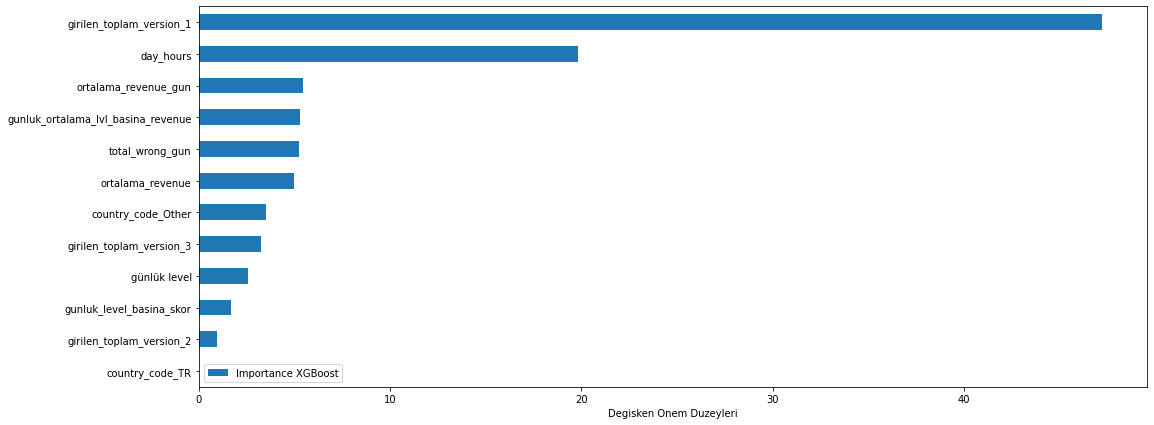

In [ ]:
# Şimdi hangi değişkenlerin en önemli olduğunu görelim

Importance = pd.DataFrame({"Importance XGBoost": xgb_tuned.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by="Importance XGBoost", axis=0, ascending=True).plot(kind="barh", figsize=(17,7))
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

In [ ]:
# GBM
# Başka modeller daha deniyoruz yine bir boosting yöntemi ile devam


from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------")
print(classification_report(y_test,y_pred))

0.9536231884057971
-----------------------------
[[ 42   8]
 [  8 287]]
-----------------------------
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        50
           1       0.97      0.97      0.97       295

    accuracy                           0.95       345
   macro avg       0.91      0.91      0.91       345
weighted avg       0.95      0.95      0.95       345



In [ ]:
# Tune 

gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,250,500,1000],
             "max_depth": [3,5,6],
             "min_samples_split": [50,75,125]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)             

gbm_cv.fit(X_train, y_train)

print("En iyi parametreler: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 31.5min finished


En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 125, 'n_estimators': 1000}


In [ ]:
# Tune sonrası elde edilen sonuç genel düz oluşturulan modele göre iyileşti

gmb_tune = GradientBoostingClassifier(learning_rate=0.1,max_depth=3,min_samples_split=125,n_estimators=1000).fit(X_train, y_train)
y_pred = gmb_tune.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("-----------------------------")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------")
print(classification_report(y_test,y_pred))

0.9623188405797102
-----------------------------
[[ 44   6]
 [  7 288]]
-----------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        50
           1       0.98      0.98      0.98       295

    accuracy                           0.96       345
   macro avg       0.92      0.93      0.92       345
weighted avg       0.96      0.96      0.96       345



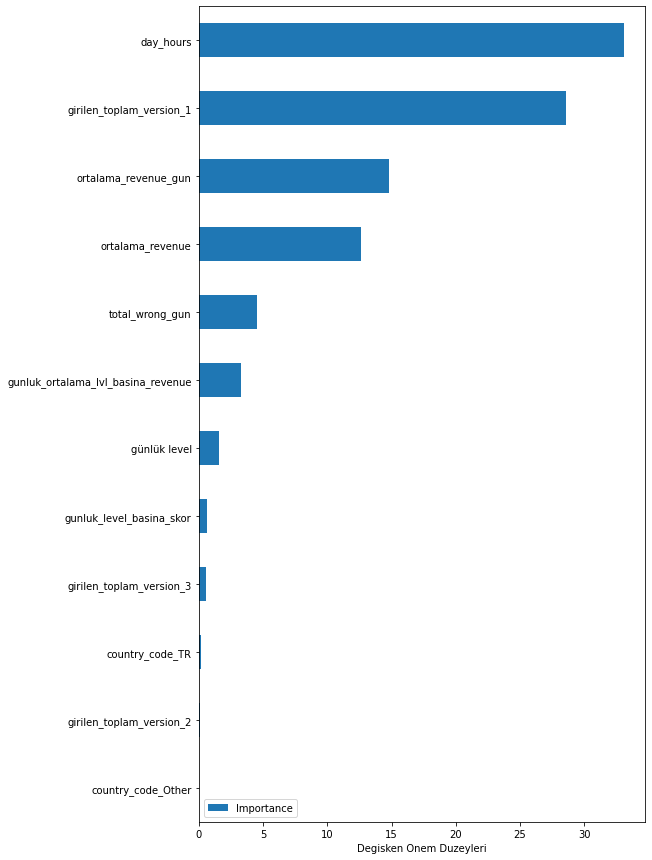

In [ ]:
# Bu modelimizin değerli bulduğu değişkenler diğerine göre biraz daha farklı

Importance = pd.DataFrame({"Importance": gmb_tune.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", figsize=(8,15))
plt.xlabel("Degisken Onem Duzeyleri")
plt.show()

0:	learn: 0.6339998	total: 2.46ms	remaining: 490ms
1:	learn: 0.5604836	total: 4.9ms	remaining: 485ms
2:	learn: 0.4990690	total: 7.11ms	remaining: 467ms
3:	learn: 0.4602955	total: 9.16ms	remaining: 449ms
4:	learn: 0.4189766	total: 12.6ms	remaining: 490ms
5:	learn: 0.3900877	total: 14.8ms	remaining: 479ms
6:	learn: 0.3642386	total: 16.9ms	remaining: 467ms
7:	learn: 0.3469969	total: 19.1ms	remaining: 458ms
8:	learn: 0.3256175	total: 21.2ms	remaining: 449ms
9:	learn: 0.3033010	total: 23.2ms	remaining: 441ms
10:	learn: 0.2812694	total: 25.3ms	remaining: 434ms
11:	learn: 0.2678101	total: 27.4ms	remaining: 429ms
12:	learn: 0.2559766	total: 29.5ms	remaining: 424ms
13:	learn: 0.2429751	total: 31.5ms	remaining: 419ms
14:	learn: 0.2319012	total: 33.6ms	remaining: 415ms
15:	learn: 0.2228016	total: 35.7ms	remaining: 411ms
16:	learn: 0.2162364	total: 37.7ms	remaining: 406ms
17:	learn: 0.2093654	total: 39.8ms	remaining: 403ms
18:	learn: 0.2034474	total: 41.9ms	remaining: 400ms
19:	learn: 0.1979316	to

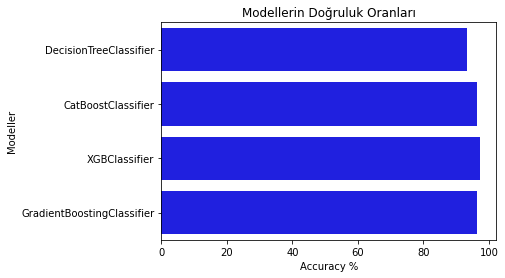

In [ ]:
# En sonda ise arka planda yazdığımız bir kod bloğunu çağırdık.
# Burada detayları yok kısaca özeti şu Karar ağacı, Cat boost, XGBoost ve GBM modellerini birlikte değerlendirmek
# Sonuç olarak XGBoost en iyi sonucu vermekte
# GridSreach durumları ayrı olarak aratildi ve optimize edilerek bu modeller elde edildi

AllModelReg(X_train,y_train,X_test,y_test)